# Neural Networks

In [1]:
# increase the width of the notebook
from IPython.display import display, HTML, Markdown

display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection   import RandomizedSearchCV
import tensorflow as tf
import joblib

## Separate features and target

In [3]:
# Load data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
# Split features/target
X_train = train.drop('Score', axis=1)
y_train = train['Score']
X_test  = test.drop('Score', axis=1)
y_test  = test['Score']

In [5]:
preprocessor = joblib.load("preprocessor_unfitted.joblib")

## Simple NN

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [7]:
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc  = preprocessor.transform(X_test)

In [8]:
X_train_proc.shape

(70000, 19)

In [15]:
input_dim = X_train_proc.shape[1]

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=[input_dim,]),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [10]:
model.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mae"]
)

# Callbacks for early stopping + best‑model checkpointing
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_simple_nn.keras', save_best_only=True)
]

In [11]:
# 4) Train
history = model.fit(
    X_train_proc, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.2366 - mae: 0.4605 - val_loss: 0.2304 - val_mae: 0.4598
Epoch 2/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2278 - mae: 0.4575 - val_loss: 0.2279 - val_mae: 0.4513
Epoch 3/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2271 - mae: 0.4566 - val_loss: 0.2272 - val_mae: 0.4546
Epoch 4/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2264 - mae: 0.4562 - val_loss: 0.2262 - val_mae: 0.4572
Epoch 5/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2267 - mae: 0.4567 - val_loss: 0.2258 - val_mae: 0.4554
Epoch 6/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2254 - mae: 0.4548 - val_loss: 0.2267 - val_mae: 0.4547
Epoch 7/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2260 - mae: 0.4557 - val_loss: 0.2268 - val_mae: 0.4578
Epoch 8/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2258 - mae: 0.4554 - val_loss: 0.2257 - val_mae: 0.4559
Epoch 9/50
1750/1750 ━━━━━━━━━━━━━━━━━━━

In [12]:
# Evaluate
test_loss, test_mae = model.evaluate(X_test_proc, y_test, verbose=1)
print(f"Test MSE: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2262 - mae: 0.4568
Test MSE: 0.2276
Test MAE: 0.4588


In [13]:
import matplotlib.pyplot as plt

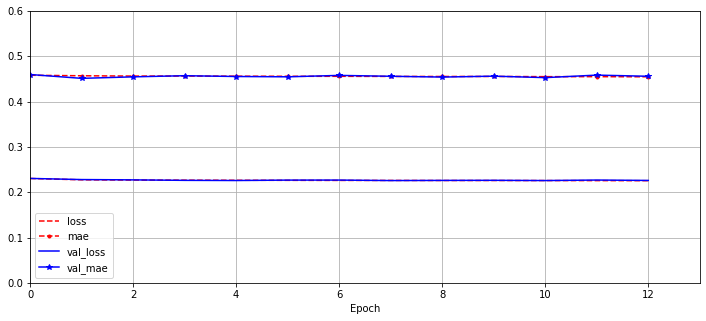

In [14]:
pd.DataFrame(history.history).plot(
    figsize=(12, 5), xlim=[0, len(history.epoch)], ylim=[0, 0.6], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
plt.show()

## Deeper Network

In [17]:
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, InputLayer

In [33]:
# Build a deeper Sequential network

model = Sequential([
    InputLayer(shape=[input_dim,]),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(1)  
])

In [34]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [35]:
# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_deep_nn.keras', save_best_only=True)]

In [36]:
# 6) Train
history = model.fit(
    X_train_proc, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.6899 - mae: 0.6389 - val_loss: 0.2280 - val_mae: 0.4570
Epoch 2/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2310 - mae: 0.4604 - val_loss: 0.2263 - val_mae: 0.4556
Epoch 3/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2305 - mae: 0.4601 - val_loss: 0.2273 - val_mae: 0.4571
Epoch 4/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2298 - mae: 0.4595 - val_loss: 0.2297 - val_mae: 0.4529
Epoch 5/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2298 - mae: 0.4594 - val_loss: 0.2280 - val_mae: 0.4585
Epoch 6/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2297 - mae: 0.4598 - val_loss: 0.2298 - val_mae: 0.4645
Epoch 7/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2286 - mae: 0.4590 - val_loss: 0.2278 - val_mae: 0.4595


In [37]:
# Evaluate
test_loss, test_mae = model.evaluate(X_test_proc, y_test, verbose=1)
print(f"Test MSE: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2265 - mae: 0.4565
Test MSE: 0.2284
Test MAE: 0.4590


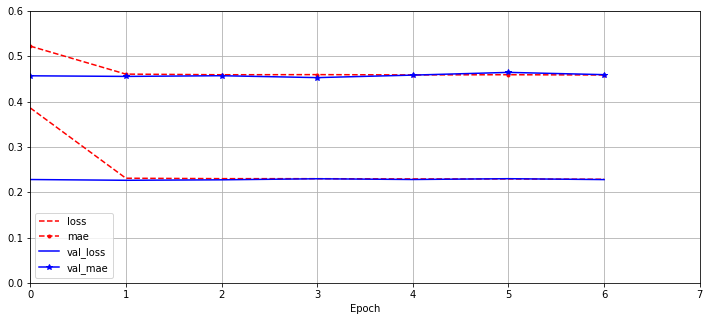

In [39]:
pd.DataFrame(history.history).plot(
    figsize=(12, 5), xlim=[0, len(history.epoch)], ylim=[0, 0.6], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
plt.show()